In [2]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob

### url_1 = 'https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews' datasets product_info and reviews
### url_2 = "https://www.kaggle.com/datasets/dominoweir/skincare-product-ingredients" dataset skin

In [3]:
# Reading cvs files and creating dataframes

folder_path = os.path.abspath('data')
files = os.listdir(folder_path)

product_info_path = os.path.join(folder_path, 'product_info.csv')
product_info = pd.read_csv(product_info_path)  # Product_info dataset
skin_path = os.path.join(folder_path, 'cosmetic_p.csv')
skin = pd.read_csv(skin_path)  # Skin dataset

review_files = [file for file in files if file.startswith('review')]
dataframes = []
for file in review_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)
reviews = pd.concat(dataframes, ignore_index=True) # Reviews dataset

C:\Users\Blanca\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


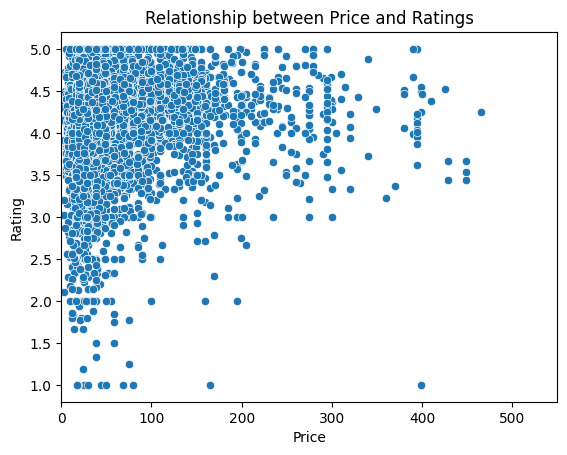

In [79]:
# Hypothesis 1: Relationship between price and ratings (product_info)
sns.scatterplot(data=product_info, x='price_usd', y='rating')
plt.title('Relationship between Price and Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.xlim(0,550)
plt.show()

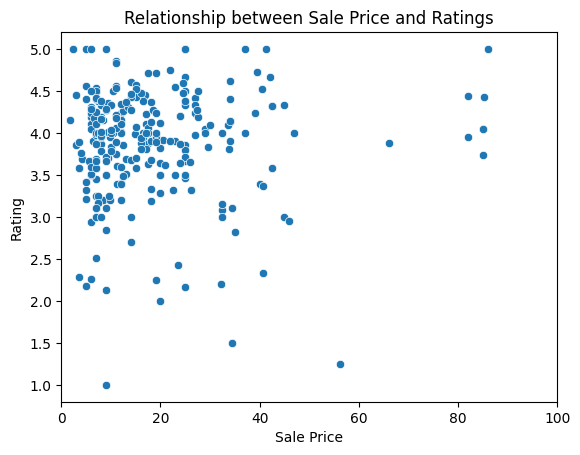

In [82]:
# Hypothesis 2: Relationship between sale price and ratings (product_info)
sns.scatterplot(data=product_info, x='sale_price_usd', y='rating')
plt.title('Relationship between Sale Price and Ratings')
plt.xlabel('Sale Price')
plt.ylabel('Rating')
plt.xlim(0,100)
plt.show()

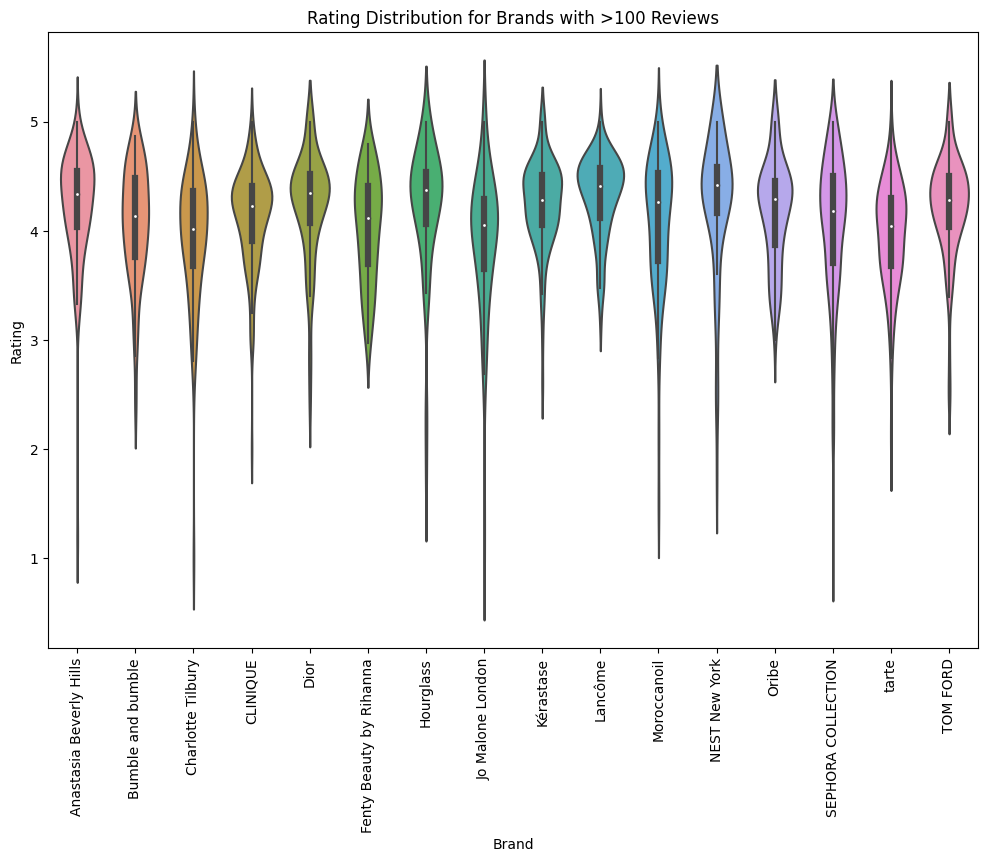

In [88]:
# Hypothesis 3: Relationship between ratings and brands. Best brands (product_info)
# Group by brand_name and calculate count of ratings
brand_stats = product_info.groupby('brand_name')['rating'].agg(['count'])

# Filter brands with more than 100 reviews
brand_stats_filtered = brand_stats[brand_stats['count'] > 75]

# Filter product_info based on the filtered brands
filtered_product_info = product_info[product_info['brand_name'].isin(brand_stats_filtered.index)]

plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_product_info, x='brand_name', y='rating')
plt.title('Rating Distribution for Brands with >100 Reviews')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

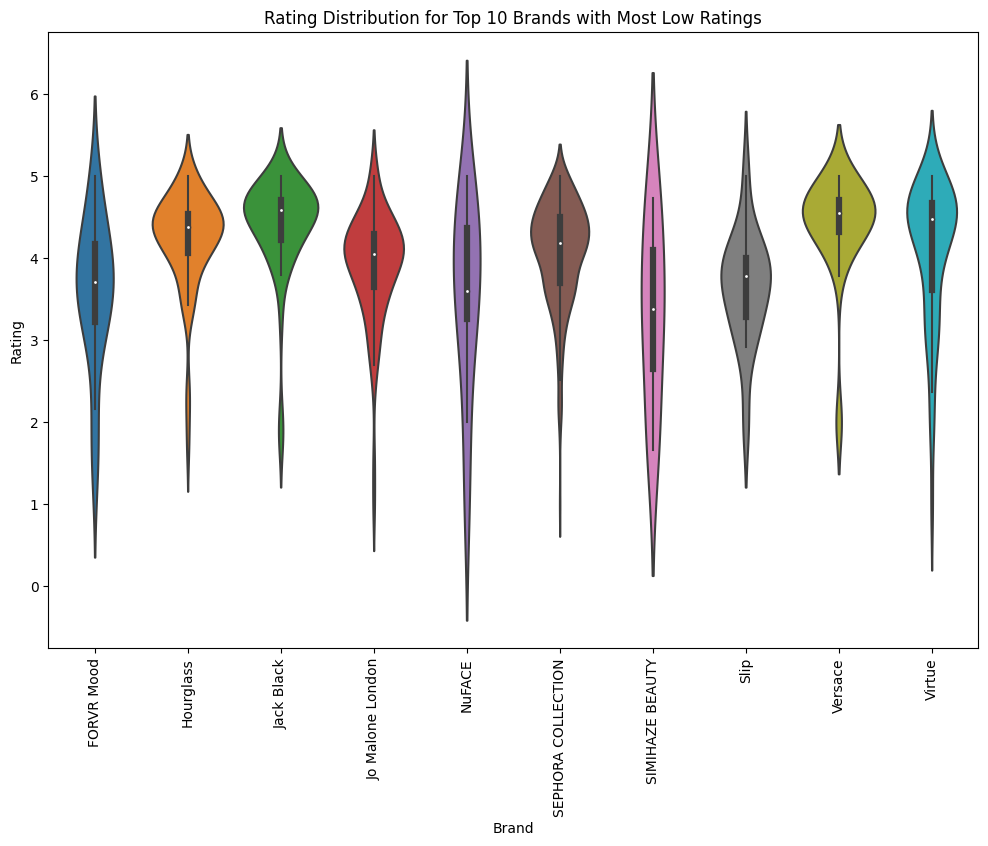

In [93]:
# Worst brands
# Set the threshold for low ratings
low_rating_threshold = 2

# Filter the product_info DataFrame for low ratings
low_ratings = product_info[product_info['rating'] <= low_rating_threshold]

# Group by brand_name and calculate the count of low ratings
brand_low_rating_counts = low_ratings['brand_name'].value_counts()

# Filter the top 10 brands with the most low ratings
top_10_low_rating_brands = brand_low_rating_counts.head(10).index

# Filter the product_info DataFrame for the top 10 brands with the most low ratings
filtered_product_info = product_info[product_info['brand_name'].isin(top_10_low_rating_brands)]

plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_product_info, x='brand_name', y='rating')
plt.title('Rating Distribution for Top 10 Brands with Most Low Ratings')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

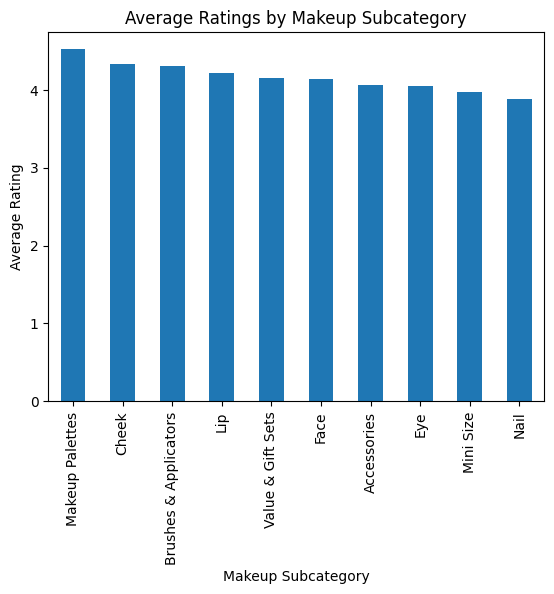

In [4]:
# Hypothesis 4: Subcategories of makeup with the highest ratings (product_info)
makeup_ratings = product_info[product_info['primary_category'] == 'Makeup']
subcategory_ratings = makeup_ratings.groupby('secondary_category')['rating'].mean().sort_values(ascending=False)
subcategory_ratings.plot(kind='bar')
plt.title('Average Ratings by Makeup Subcategory')
plt.xlabel('Makeup Subcategory')
plt.ylabel('Average Rating')
plt.show()

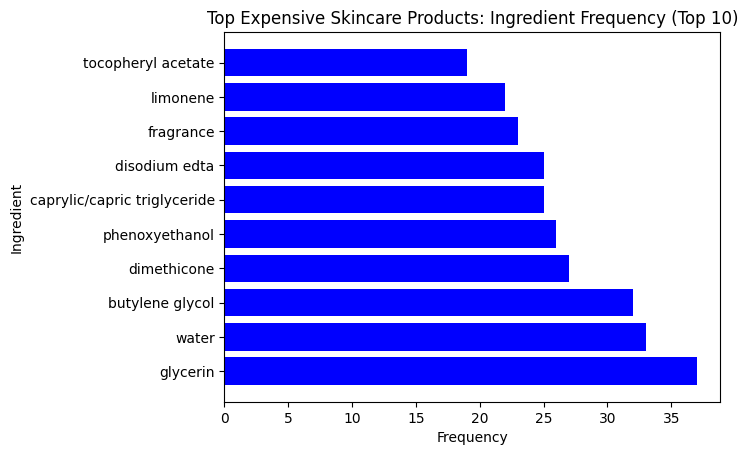

In [19]:
# Hypothesis 5: The most expensive skincare ingredients and ratings (skin)
# Filter the dataset for skincare products with price and ingredient information
skincare_data = skin[(skin['ingredients'].notnull()) & (skin['price'].notnull())]

# Sort the dataset by price_usd in descending order to get the most expensive products
skincare_data = skincare_data.sort_values('price', ascending=False)

# Define the number of top expensive products to consider
top_products = 50

# Retrieve the top N most expensive products
top_expensive_products = skincare_data.head(top_products)

# Create a list to store the frequency of each ingredient
ingredient_frequency = {}

# Iterate over each product in the top expensive products
for ingredients in top_expensive_products['ingredients']:
    # Split the ingredients on commas and iterate over each ingredient
    for ingredient in ingredients.split(','):
        # Remove leading/trailing whitespace and convert to lowercase for consistency
        ingredient = ingredient.strip().lower()
        # Increment the frequency count for the ingredient
        ingredient_frequency[ingredient] = ingredient_frequency.get(ingredient, 0) + 1

# Convert the ingredient frequency dictionary into a DataFrame
ingredient_df = pd.DataFrame(list(ingredient_frequency.items()), columns=['Ingredient', 'Frequency'])

# Sort the DataFrame by frequency in descending order
ingredient_df = ingredient_df.sort_values('Frequency', ascending=False)

# Select the top 10 ingredients
top_10_ingredients_2 = ingredient_df.head(10)

# Create the bar chart
plt.barh(top_10_ingredients_2['Ingredient'], top_10_ingredients_2['Frequency'], color='blue')

# Set the title and labels
plt.title('Top Expensive Skincare Products: Ingredient Frequency (Top 10)')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')

# Display the chart
plt.show()


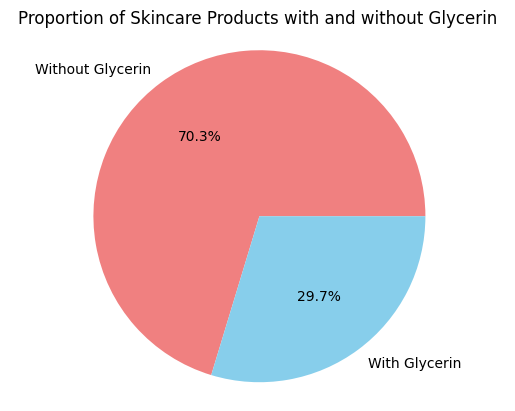

In [8]:
# Filter the dataset for skincare products with price, ingredient, and rating information
skincare_data = skin[(skin['ingredients'].notnull()) & (skin['price'].notnull()) & (skin['rank'].notnull())]

# Check if "glycerin" is present in each product's ingredients
skincare_data['contains_glycerin'] = skincare_data['ingredients'].str.contains('glycerin', case=False)

# Count the number of products containing glycerin and not containing glycerin
glycerin_counts = skincare_data['contains_glycerin'].value_counts()

# Create a pie chart to show the proportion of products containing glycerin
plt.pie(glycerin_counts, labels=['Without Glycerin', 'With Glycerin'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Proportion of Skincare Products with and without Glycerin')
plt.axis('equal')
plt.show()

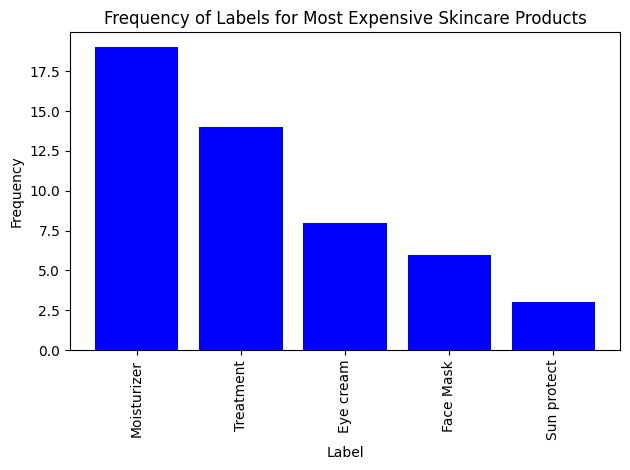

In [22]:
# Filter the dataset for skincare products with price, ingredient, and label information
skincare_data = skin[(skin['ingredients'].notnull()) & (skin['price'].notnull()) & (skin['Label'].notnull())]

# Sort the dataset by price_usd in descending order to get the most expensive products
skincare_data = skincare_data.sort_values('price', ascending=False)

# Define the number of top expensive products to consider
top_products = 50

# Retrieve the top N most expensive products
top_expensive_products = skincare_data.head(top_products)

# Get the values in the "label" column for the most expensive products
labels = top_expensive_products['Label']

# Count the frequency of each label
label_counts = labels.value_counts()

# Create a bar chart to visualize the label frequencies
plt.bar(label_counts.index, label_counts.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Labels for Most Expensive Skincare Products')
plt.tight_layout()
plt.show()

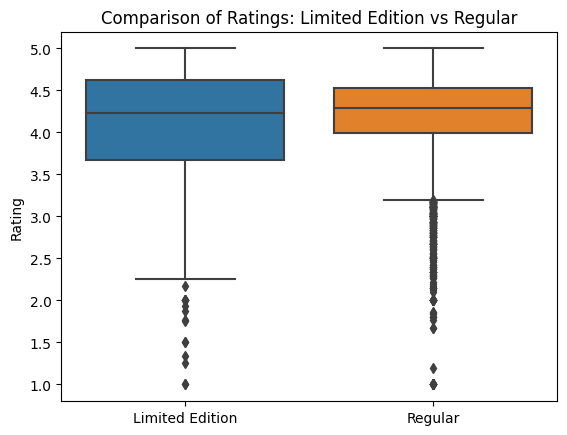

In [40]:
# Hypothesis 6: Does a limited edition item get better ratings? (product_info)
limited_edition_ratings = product_info[product_info['limited_edition'] == True]['rating']
non_limited_edition_ratings = product_info[product_info['limited_edition'] == False]['rating']
sns.boxplot(data=[limited_edition_ratings, non_limited_edition_ratings])
plt.title('Comparison of Ratings: Limited Edition vs Regular')
plt.xticks([0, 1], ['Limited Edition', 'Regular'])
plt.ylabel('Rating')
plt.show()

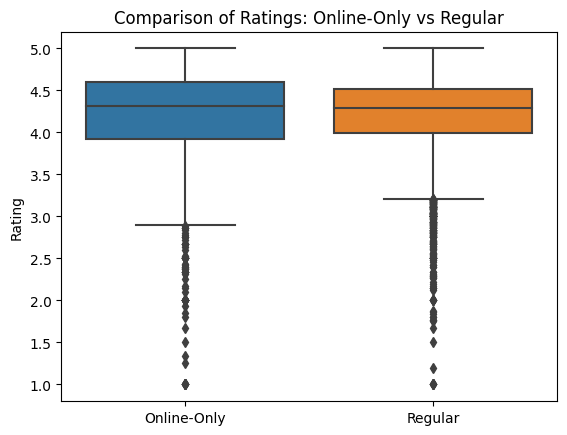

In [41]:
# Hypothesis 7: Do online-only products get rated better? (product_info)
online_only_ratings = product_info[product_info['online_only'] == True]['rating']
non_online_only_ratings = product_info[product_info['online_only'] == False]['rating']
sns.boxplot(data=[online_only_ratings, non_online_only_ratings])
plt.title('Comparison of Ratings: Online-Only vs Regular')
plt.xticks([0, 1], ['Online-Only', 'Regular'])
plt.ylabel('Rating')
plt.show()

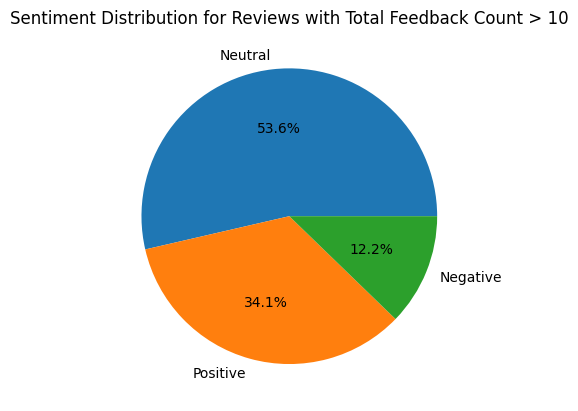

In [106]:
# Hypothesis 8: Words that occur most frequently in positive reviews (reviews)
# Convert review_title values to strings
reviews['review_title'] = reviews['review_title'].astype(str)

# Sentiment Analysis using TextBlob
reviews['sentiment_score'] = reviews['review_title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment as positive, negative, or neutral
reviews['sentiment_category'] = reviews['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Filter the DataFrame based on total_feedback_count
filtered_reviews = reviews[reviews['total_feedback_count'] > 10]

# Drop rows with 'nan' and 'NAN' sentiment_category
filtered_reviews = filtered_reviews[~filtered_reviews['sentiment_category'].str.lower().isin(['nan'])]

# Count sentiment categories
sentiment_counts = filtered_reviews['sentiment_category'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution for Reviews with Total Feedback Count > 10')
plt.show()

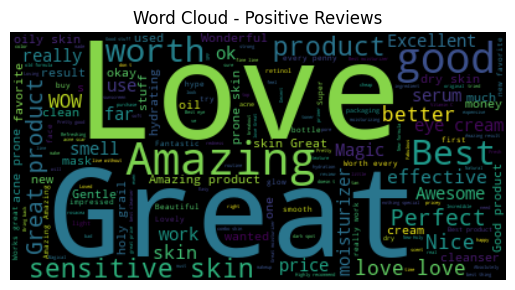

In [112]:
# Positive reviews wordcloud
positive_reviews = filtered_reviews[filtered_reviews['sentiment_category'] == 'Positive']['review_title']
negative_reviews = filtered_reviews[filtered_reviews['sentiment_category'] == 'Negative']['review_title']

# Positive reviews word cloud
positive_wordcloud = WordCloud().generate(' '.join(positive_reviews))
plt.figure()
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

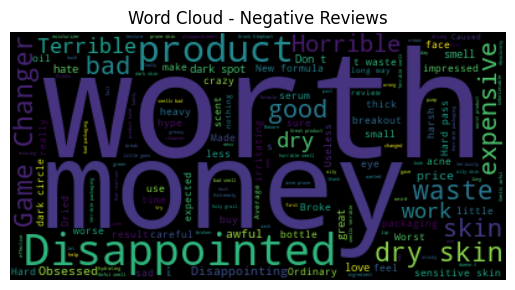

In [115]:
# Negative reviews wordcloud
negative_wordcloud = WordCloud().generate(' '.join(negative_reviews))
plt.figure()
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

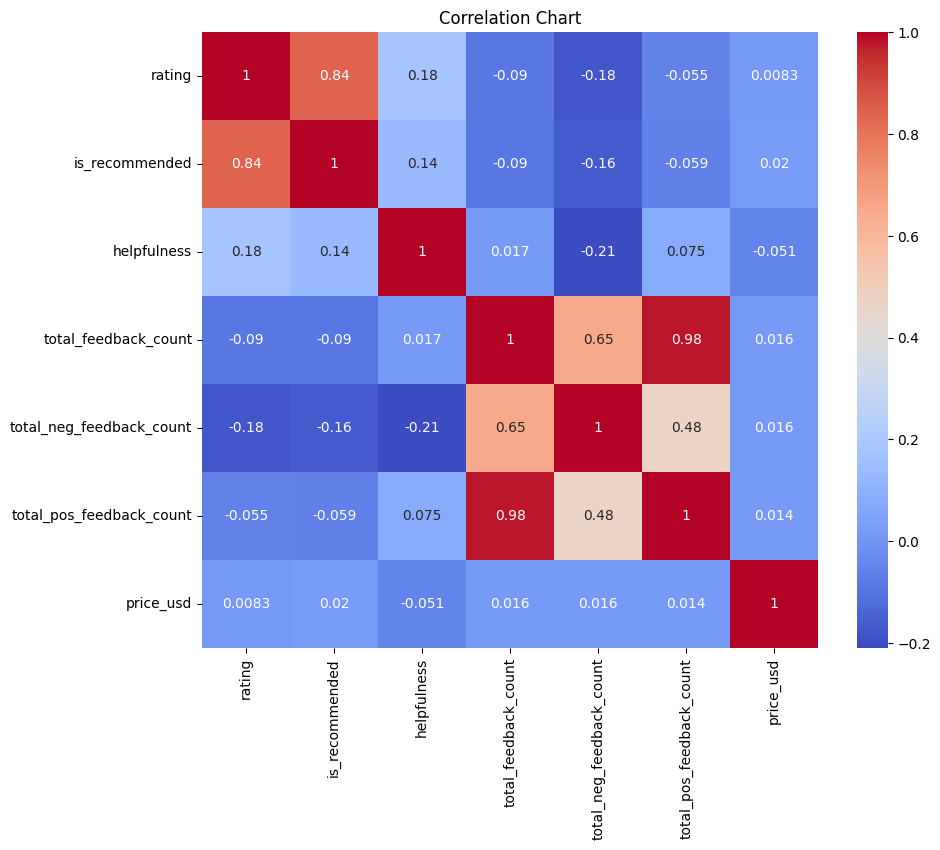

In [118]:
# Hypothesis 9: Correlation between rates, recommendations, feedback and price (reviews)
# Create a subset of the 'reviews' DataFrame with the desired variables
subset = reviews[['rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']]

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Chart')
plt.show()

         sentiment_score  total_pos_feedback_count  total_neg_feedback_count
21                  0.00                         8                         3
176                 0.00                         8                         8
182                -0.15                        13                         5
297                 0.00                        11                         6
372                 0.00                        10                         9
...                  ...                       ...                       ...
1301041             1.00                        15                         2
1301042             0.00                        11                        11
1301052             0.00                        20                         5
1301079             0.00                         9                         2
1301090            -1.00                        14                        15

[116842 rows x 3 columns]


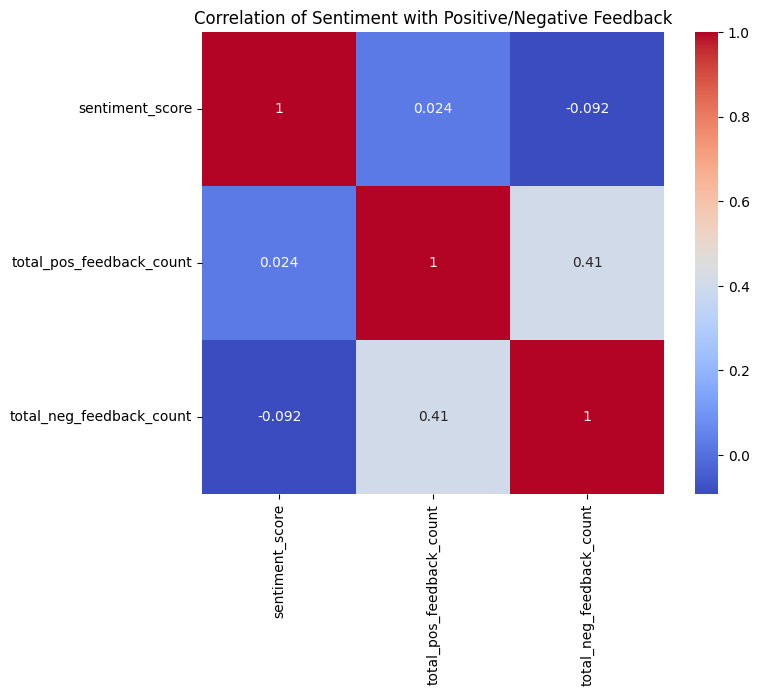

In [121]:
# Create a subset of the filtered DataFrame with sentiment and feedback variables
subset = filtered_reviews[['sentiment_score', 'total_pos_feedback_count', 'total_neg_feedback_count']]

print(subset)

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation of Sentiment with Positive/Negative Feedback')
plt.show()

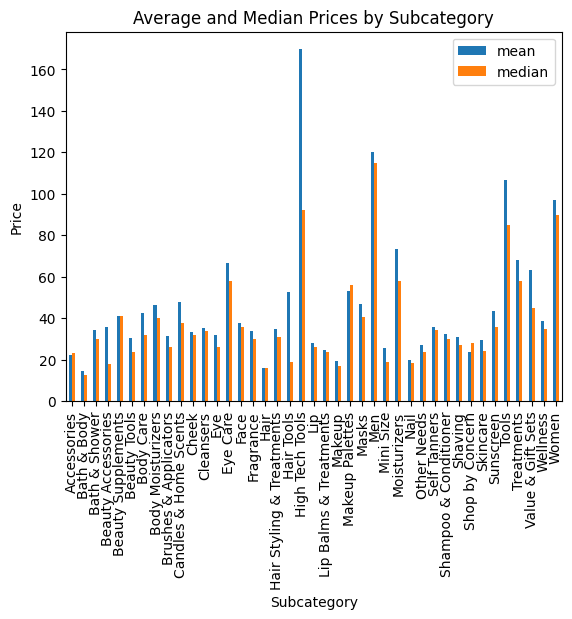

In [72]:
# Hypothesis 10: Average and median prices per subcategory of products (product_info)
subcategory_prices = product_info.groupby('secondary_category')['price_usd'].agg(['mean', 'median'])
subcategory_prices.plot(kind='bar')
plt.title('Average and Median Prices by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Price')
plt.show()